<a href="https://colab.research.google.com/github/Sachin-D-N/Amazon_Food_Reviews/blob/main/06.Support_Vector_Machines_Amazon_Food_Reviews/Support_Vector_Machines_Amazon_Food_Reviews_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Assignment : Apply Support Vector Machines

<ol>
    <li><strong>Apply SVM on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Procedure</strong>
        <ul>
    <li>You need to work with 2 versions of SVM
        <ul><li>Linear kernel</li>
            <li>RBF kernel</li></ul>
    <li>When you are working with linear kernel, use SGDClassifier’ with hinge loss because it is computationally less expensive.</li>
    <li>When you are working with ‘SGDClassifier’ with hinge loss and trying to find the AUC
        score, you would have to use <a href='https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html'>CalibratedClassifierCV</a></li>
    <li>Similarly, like kdtree of knn, when you are working with RBF kernel it's better to reduce
the number of dimensions. You can put min_df = 10, max_features = 500 and consider a sample size of 40k points.</li>                
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>When you are working on the linear kernel with BOW or TFIDF please print the top 10 best
features for each of the positive and negative classes.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    </li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    </li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    
<br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
    </li>
        </ul>
</ol>

    
    
    

###  we already strored the preprocessed_data in a file to know the preprocessing steps visit <a href='https://github.com/Sachin-D-N/Amazon_Food_Reviews/blob/main/01.Amazon_Fine_Food_Review_Analysis_Featurization/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb'>here </a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading Libraries
import numpy as np
import pandas as pd

In [ ]:
#load the preprocessed data 
data=pd.read_csv('/content/drive/My Drive/preprocessed_data.csv',nrows=100000) 

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,love book miss hard cover version
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,chicken soup rice month
3,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud nice rhythm well g...,good swingi rhythm read aloud
4,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...,great way learn month


In [ ]:
#use preprocessed_reviews and score for building a model
X=data['preprocessed_reviews'].values
Y=data['Score'].values

In [ ]:
print(X.shape)
print(Y.shape)

(100000,)
(100000,)


# Featurization using Bag_of_words

In [ ]:
#data splitting
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_cv.shape,Y_cv.shape)

(49000,) (49000,)
(30000,) (30000,)
(21000,) (21000,)


In [ ]:
#Apply Bow Features on Splitted data
from sklearn.feature_extraction.text import CountVectorizer
Vect=CountVectorizer()
Bow_train=Vect.fit_transform(X_train)
Bow_cv=Vect.transform(X_cv)
Bow_test=Vect.transform(X_test)
print(Bow_train.shape,Y_train.shape)
print(Bow_test.shape,Y_test.shape)
print(Bow_cv.shape,Y_cv.shape)

(49000, 29434) (49000,)
(30000, 29434) (30000,)
(21000, 29434) (21000,)


# Applying Support Vector Machines

Applying Linear SVM on BOW,

In [ ]:
#hyperparameter tuning for find optimal_K
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as pyplt
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if sys.path[0] == '':


In [ ]:
# we should standardize the data before applying logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_bow = sc.fit_transform(Bow_train)
X_test_bow = sc.transform(Bow_test)
X_cv_bow=sc.transform(Bow_cv)

In [ ]:
#defining function for find hyper parameter

def Hyper_parameter(X_train,X_cv,Y_train,Y_cv):
    import warnings
    max_roc_auc=-1
    cv_scores = []
    train_scores = []
    penalties = ['l1', 'l2']
    C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    for i in C:
      for p in penalties:
        model= SGDClassifier(alpha=i, penalty=p, loss='hinge', random_state=42)
        model.fit(X_train,Y_train)
        clf = CalibratedClassifierCV(model, method="sigmoid")
        clf.fit(X_train, Y_train)
        y_score=clf.predict_proba(X_cv)[:,1]
        scores = roc_auc_score(Y_cv, y_score)
        cv_scores.append(scores)
        y_score=clf.predict_proba(X_train)[:,1]
        scores = roc_auc_score(Y_train, y_score)
        train_scores.append(scores)
        s=['0.00001+L1', '0.00001+L2', '0.0001+L1', '0.0001+L2', '0.001+L1', '0.001+L2', '0.01+L1', '0.01+L2',
         '0.1+L1', '0.1+L2', '1+L1', '1+L2', '10+L1', '10+L2', '100+L1', '100+L2','1000+L1','1000+L2','10000+L1','10000+L2']
    optimal_alpha= s[cv_scores.index(max(cv_scores))]
    alpha=[math.log(x) for x in C]#converting values of alpha into logarithm
    fig = plt.figure(figsize=(20,5))
    ax = plt.subplot()
    ax.plot(s, train_scores, label='AUC train')
    ax.plot(s, cv_scores, label='AUC CV')
    plt.title('AUC vs hyperparameter')
    plt.xlabel('alpha')
    plt.ylabel('AUC')
    plt.xticks()
    ax.legend()
    plt.show()
    print('best Cross validation score: {:.3f}'.format(max(cv_scores)))
    print('optimal alpha and penalty for which auc is maximum : ',optimal_alpha)
    


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

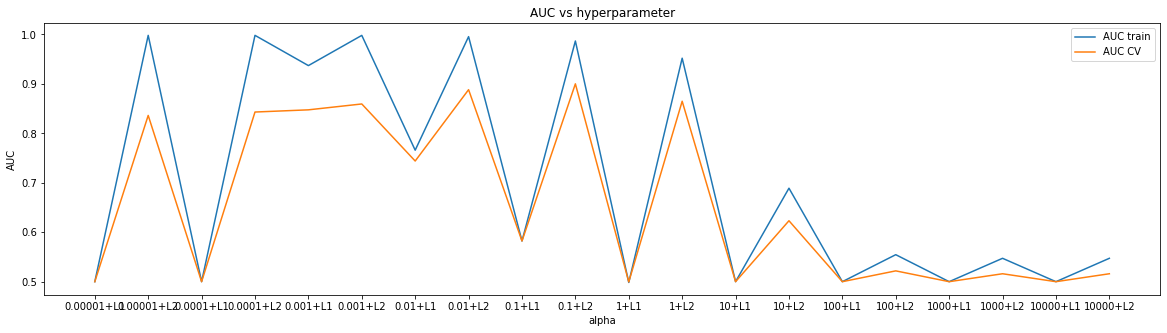

best Cross validation score: 0.900
optimal alpha and penalty for which auc is maximum :  0.1+L2


In [ ]:
import warnings
Hyper_parameter(X_train_bow,X_cv_bow,Y_train,Y_cv)

In [ ]:
best_alpha=0.1
best_penalty='l2'

In [ ]:
#function for testing test data
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

def test_data(x_train,y_train,x_test,y_test):
    model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
    clf = CalibratedClassifierCV(base_estimator=model, cv=None)
   
    clf.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

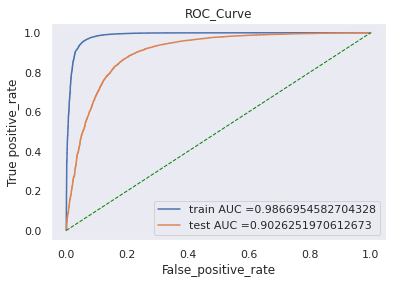

The AUC_score of test_data is : 0.9026251970612673


In [ ]:
test_data(X_train_bow,Y_train,X_test_bow,Y_test)

In [ ]:
#defining a function for computing the metric score
#Confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metric(x_train,y_train,x_test,y_test):
    model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
    clf = CalibratedClassifierCV(base_estimator=model, cv=None)
    clf.fit(x_train, y_train)
    predict=clf.predict(x_test)
   
    conf_mat = confusion_matrix(Y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

           0       0.83      0.43      0.56      4529
           1       0.91      0.98      0.94     25471

    accuracy                           0.90     30000
   macro avg       0.87      0.71      0.75     30000
weighted avg       0.89      0.90      0.89     30000



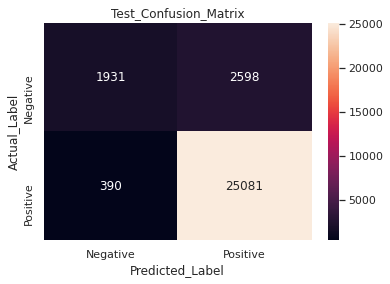

In [ ]:
metric(X_train_bow,Y_train,X_test_bow,Y_test)

# Feature Importance on BOW

Top 10 important features 

In [ ]:
# top 10 important positive and Negative features
model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
model.fit(X_train_bow, Y_train)

all_features=Vect.get_feature_names()

weight=model.coef_
pos_indx=np.argsort(weight)[:,::-1]

neg_indx=np.argsort(weight)

print('Top 10 positive features :')
for i in list(pos_indx[0][0:10]):
    print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

print('***********************************************')

print('Top 10 negative features :')
for i in list(neg_indx[0][:10]):
   print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

Top 10 positive features :
       great	--> 	0.201175
        love	--> 	0.195757
        best	--> 	0.154144
        good	--> 	0.151492
      delici	--> 	0.110906
       excel	--> 	0.096589
     perfect	--> 	0.089836
     favorit	--> 	0.083274
        nice	--> 	0.081187
      wonder	--> 	0.072457
***********************************************
Top 10 negative features :
  disappoint	--> 	-0.125180
         not	--> 	-0.097213
       worst	--> 	-0.083189
     terribl	--> 	-0.076410
      return	--> 	-0.074292
          aw	--> 	-0.070846
       stale	--> 	-0.064304
    unfortun	--> 	-0.064012
       threw	--> 	-0.061902
       money	--> 	-0.058714


# Featurization using TFIDF

In [ ]:
# difine the tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(1, 2),min_df=10)
Train_tf_idf=tf_idf.fit_transform(X_train)
Cross_tf_idf=tf_idf.transform(X_cv)
Test_tf_idf=tf_idf.transform(X_test)
print(Train_tf_idf.shape,Y_train.shape)
print(Cross_tf_idf.shape,Y_cv.shape)
print(Test_tf_idf.shape,Y_test.shape)

(49000, 28869) (49000,)
(21000, 28869) (21000,)
(30000, 28869) (30000,)


In [ ]:
# we should standardize the data before applying logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_tfidf = sc.fit_transform(Train_tf_idf)
X_cross_tfidf= sc.fit_transform(Cross_tf_idf)
X_test_tfidf = sc.transform(Test_tf_idf)

Applying Linear_SVM on tfidf features,

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

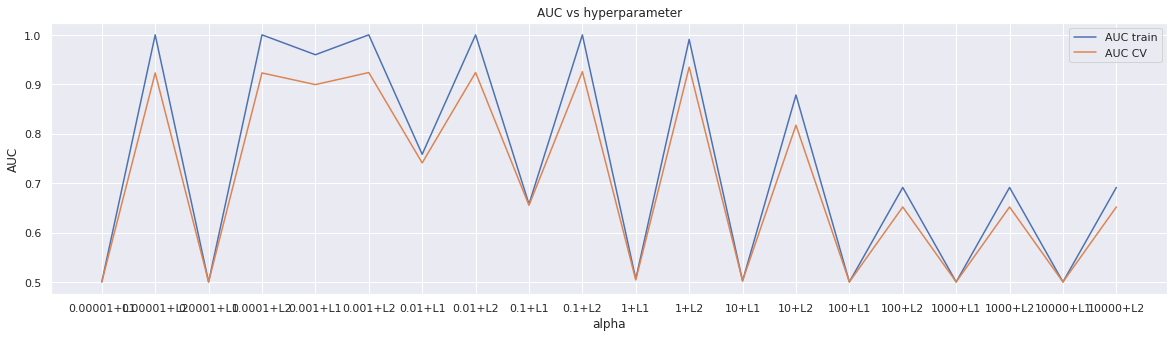

best Cross validation score: 0.935
optimal alpha and penalty for which auc is maximum :  1+L2


In [ ]:
#hyper parameter tuning
Hyper_parameter(X_train_tfidf,X_cross_tfidf,Y_train,Y_cv)

In [ ]:
#best alpha and penalty by  hyper parameter tuning
best_alpha=1
best_penalty='l2'

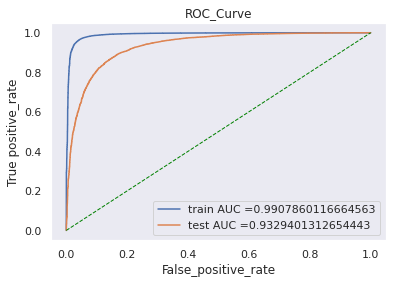

The AUC_score of test_data is : 0.9329401312654443


In [ ]:
#testing with the test data
test_data(X_train_tfidf,Y_train,X_test_tfidf,Y_test)

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      4529
           1       0.93      0.97      0.95     25471

    accuracy                           0.92     30000
   macro avg       0.87      0.79      0.82     30000
weighted avg       0.91      0.92      0.91     30000



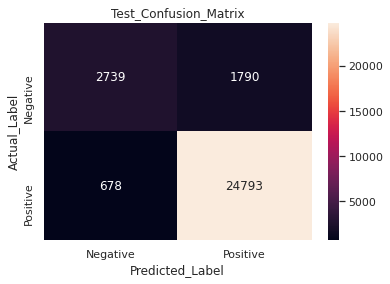

In [ ]:
#performance metric
metric(X_train_tfidf,Y_train,X_test_tfidf,Y_test)

# Feature Importance on tfidf

Top 10 important features 

In [ ]:
# top 10 important positive and Negative features
model = SGDClassifier(loss='hinge', penalty=best_penalty, alpha=best_alpha, n_jobs=-1)
model.fit(X_train_tfidf, Y_train)

features=tf_idf.get_feature_names()

weight=model.coef_
pos_indx=np.argsort(weight)[:,::-1]

neg_indx=np.argsort(weight)

print('Top 10 positive features :')
for i in list(pos_indx[0][0:10]):
    print("%12s\t--> \t%f"%(features[i],weight[0,i]))

print('***********************************************')

print('Top 10 negative features :')
for i in list(neg_indx[0][:10]):
   print("%12s\t--> \t%f"%(features[i],weight[0,i]))

Top 10 positive features :
        love	--> 	0.047048
       great	--> 	0.045181
        good	--> 	0.037385
        best	--> 	0.035058
      delici	--> 	0.029189
       excel	--> 	0.024260
     perfect	--> 	0.022380
         use	--> 	0.021581
        nice	--> 	0.020216
     favorit	--> 	0.020179
***********************************************
Top 10 negative features :
  disappoint	--> 	-0.039038
     not buy	--> 	-0.030269
       worst	--> 	-0.027964
   not worth	--> 	-0.026797
not recommend	--> 	-0.025950
          aw	--> 	-0.024936
     terribl	--> 	-0.024258
      return	--> 	-0.024153
  wast money	--> 	-0.022813
       threw	--> 	-0.021227


Featurization using Word2Vec

In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
train_list_of_sentance=[]
for sentance in X_train:
    train_list_of_sentance.append(sentance.split())

In [ ]:
# Train your own Word2Vec model using your own text corpus for cross_validation data
i=0
cv_list_of_sentance=[]
for sentance in X_cv:
    cv_list_of_sentance.append(sentance.split())

In [ ]:
# Train your own Word2Vec model using your own text corpus for test data
i=0
test_list_of_sentance=[]
for sentance in X_test:
    test_list_of_sentance.append(sentance.split())

In [ ]:
print(len(train_list_of_sentance))
print(len(cv_list_of_sentance))
print(len(test_list_of_sentance))

49000
21000
30000


In [ ]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# min_count = 5 considers only words that occured atleast 5 times
train_w2v_model=Word2Vec(train_list_of_sentance,min_count=5,size=50, workers=4)

In [ ]:
#train_data
train_w2v_words = list(train_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(train_w2v_words))
print("sample words ", train_w2v_words[0:50])

number of words that occured minimum 5 times  9358
sample words  ['syrup', 'mainstay', 'grow', 'great', 'find', 'onlin', 'uniqu', 'ever', 'excel', 'cook', 'realli', 'enjoy', 'product', 'two', 'order', 'total', 'bag', 'anoth', 'shipment', 'day', 'tea', 'wife', 'drink', 'spoil', 'hope', 'continu', 'avail', 'jame', 'got', 'littl', 'end', 'semest', 'gift', 'fun', 'follow', 'direct', 'came', 'along', 'fridg', 'soak', 'daili', 'mist', 'week', 'hand', 'mushroom', 'readi', 'harvest', 'not', 'experi', 'problem']


In [ ]:
#cross_validation_data
cv_w2v_model=Word2Vec(cv_list_of_sentance,min_count=5,size=50, workers=4)
cv_w2v_words = list(cv_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(cv_w2v_words))
print("sample words ", cv_w2v_words[0:50])

number of words that occured minimum 5 times  6379
sample words  ['like', 'way', 'tea', 'tast', 'not', 'particular', 'care', 'black', 'licoric', 'subtl', 'enough', 'handl', 'recent', 'ran', 'yogi', 'kava', 'stress', 'relief', 'chocol', 'sweet', 'notic', 'anyth', 'want', 'give', 'john', 'wort', 'tri', 'see', 'job', 'steep', 'two', 'teabag', 'put', 'blue', 'agav', 'nectar', 'report', 'back', 'updat', 'soon', 'gone', 'away', 'week', 'well', 'realli', 'use', 'bag', 'day', 'box', 'ginger']


In [ ]:
#test_data
test_w2v_model=Word2Vec(test_list_of_sentance,min_count=5,size=50, workers=4)  
test_w2v_words = list(test_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(test_w2v_words))
print("sample words ", test_w2v_words[0:50])

number of words that occured minimum 5 times  7457
sample words  ['cook', 'lot', 'chines', 'dish', 'household', 'sweet', 'chili', 'sauc', 'must', 'one', 'favorit', 'sesam', 'chicken', 'could', 'not', 'seem', 'get', 'flavor', 'right', 'ad', 'yum', 'got', 'mail', 'today', 'know', 'sound', 'weird', 'say', 'hash', 'brown', 'haha', 'come', 'dri', 'ice', 'cooler', 'box', 'lil', 'plastic', 'bag', 'stick', 'bake', 'sheet', 'min', 'degre', 'oven', 'smell', 'chees', 'nice', 'crunchi', 'outsid']


# Converting text into vectors using Avg W2V

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in train_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
train_vectors = np.array(train_vectors)
print(train_vectors.shape)
print(train_vectors[0])

(49000, 50)
[-0.3703404  -0.656941    0.13626171 -0.04795685 -0.32270301 -0.15938984
 -0.16651956  0.06297334 -0.29747305 -0.43693638 -0.12686386  0.27142387
  0.65612504  0.28111689  0.16410723 -0.32830278 -0.57767697 -0.44970733
  0.7169482   0.35639795  0.70029585  0.27569361  1.24075977 -0.39008316
 -0.57850702  0.47436081  0.89304999 -0.66836908  1.65802425  0.58416203
  0.03141647  0.11041497  0.42270852 -0.29302249  0.65571207 -0.17618633
 -0.19619202 -0.58893621 -0.93642414  0.08798918 -0.31691761  0.49340062
 -0.14608191 -0.53057582  0.62867289 -0.72654325 -0.14446987 -0.46211083
 -0.61575916  0.17671937]


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
cv_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in cv_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in cv_w2v_words:
            vec = cv_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    cv_vectors.append(sent_vec)
cv_vectors = np.array(cv_vectors)
print(cv_vectors.shape)
print(cv_vectors[0])

(21000, 50)
[-0.2277243   0.01424151  0.26722542 -0.19761466 -0.06151952 -0.27755885
  0.0210005   0.73801768  0.2374148   0.46089989  0.01026628  0.68088467
  0.59762091 -0.21324823  0.00496949  0.38072684 -0.23866158  0.42071861
  0.18920695  0.49251759  0.18774711 -0.25618782  0.77313611  0.32690523
 -0.10707266 -0.64246214 -0.34925628  0.23863576 -0.2432293   0.1378211
  0.05495123 -0.33344769 -0.12199358  0.2061833   0.64153705 -0.26031913
  0.53623823  0.02555553 -0.21501678  0.10154835 -0.00452799  0.44292115
  0.92262575 -0.0856623  -0.28533485  0.39823539  0.31932062 -0.53529565
 -0.30807323 -0.24436701]


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)
test_vectors = np.array(test_vectors)
print(test_vectors.shape)
print(test_vectors[0])

(30000, 50)
[-0.1439986   0.06751937 -0.41886383 -0.341009    0.79264914  0.02856496
  0.2732071   1.07438136 -0.19969043 -0.67155581 -0.11449501  0.056799
  0.62133624  0.40755456  0.25528647  0.13337781 -0.71747555 -0.08978727
  1.04609928 -0.06052016  0.38225345  0.6912901   0.66705643  0.11530556
 -0.15534154 -0.08766763 -0.13824636 -0.04314137  0.20397657  1.23963967
  0.21626563 -0.18166227 -0.48242191 -0.08974654 -0.18849146  0.07958995
  0.36015138 -0.72797258 -0.5027059  -0.37177954  0.74094555 -0.70307656
  0.37320183  0.15269391  0.04699541  0.18685848  0.3197957   0.02974064
 -1.03082384 -0.6910526 ]


In [ ]:
avgw2v_train= np.array(train_vectors)
avgw2v_cv= np.array(cv_vectors)
avgw2v_test= np.array(test_vectors)

Applying Linear_SVM on Avgw2vec features

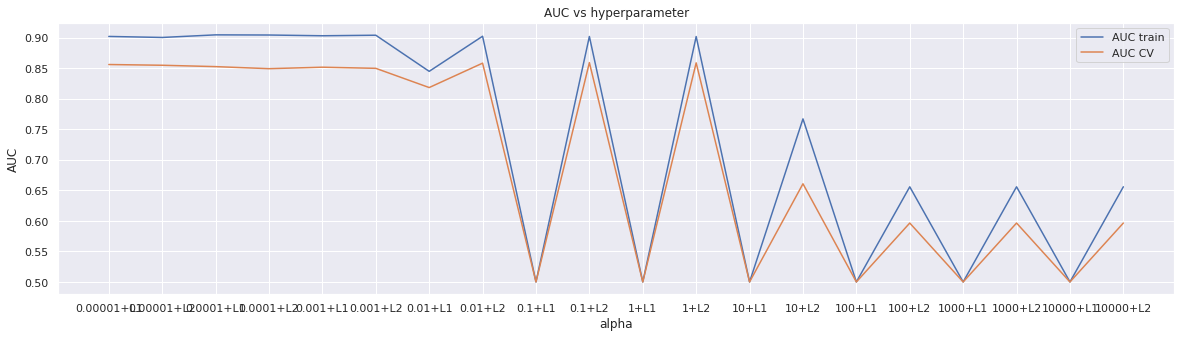

best Cross validation score: 0.859
optimal alpha and penalty for which auc is maximum :  0.1+L2


In [ ]:
#hyper_parameter tuning to find best alpha and penalty
Hyper_parameter(avgw2v_train,avgw2v_cv,Y_train,Y_cv)

In [ ]:
#best alpha and penalty by  hyper parameter tuning
best_alpha=0.1
best_penalty='l2'

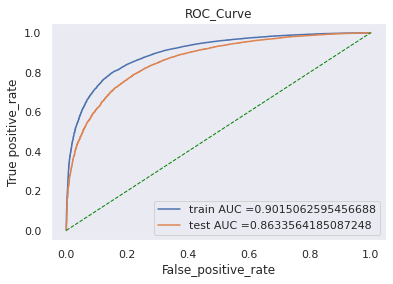

The AUC_score of test_data is : 0.8633564185087248


In [ ]:
#testing with the test data
test_data(avgw2v_train,Y_train,avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.73      0.18      0.29      4529
           1       0.87      0.99      0.93     25471

    accuracy                           0.87     30000
   macro avg       0.80      0.59      0.61     30000
weighted avg       0.85      0.87      0.83     30000



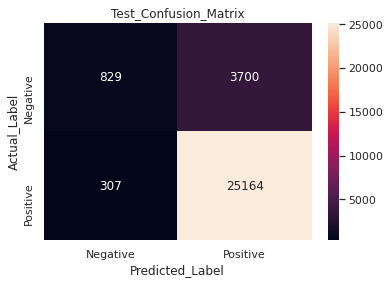

In [ ]:
#performance metric
metric(avgw2v_train,Y_train,avgw2v_test,Y_test)

# Converting text into vectors using TFIDF W2V

In [ ]:
tfidf_vect = TfidfVectorizer()
train_tfidf_w2v = tfidf_vect.fit_transform(X_train)

In [ ]:
dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))

In [ ]:
# tf_idf_w2v words of train data
tfidf_feat = tfidf_vect.get_feature_names()
train_tfidf_w2v_vectors = []
row = 0
for sent in train_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in train_w2v_words and word in tfidf_feat:
            vec = train_w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    train_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
# tf_idf_w2v words of cross_validate data
tfidf_feat = tfidf_vect.get_feature_names()
cv_tfidf_w2v_vectors = []
row = 0
for sent in cv_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in cv_w2v_words and word in tfidf_feat:
            vec = cv_w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    cv_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
# tf_idf_w2v words of test data
tfidf_feat = tfidf_vect.get_feature_names()
test_tfidf_w2v_vectors = []
row = 0
for sent in test_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in test_w2v_words and word in tfidf_feat:
            vec = test_w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    test_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
tfidf_avgw2v_train= np.array(train_tfidf_w2v_vectors)
tfidf_avgw2v_cv=np.array(cv_tfidf_w2v_vectors)
tfidf_avgw2v_test= np.array(test_tfidf_w2v_vectors)

Applying Linear_SVM on tfidfAvgw2vec features

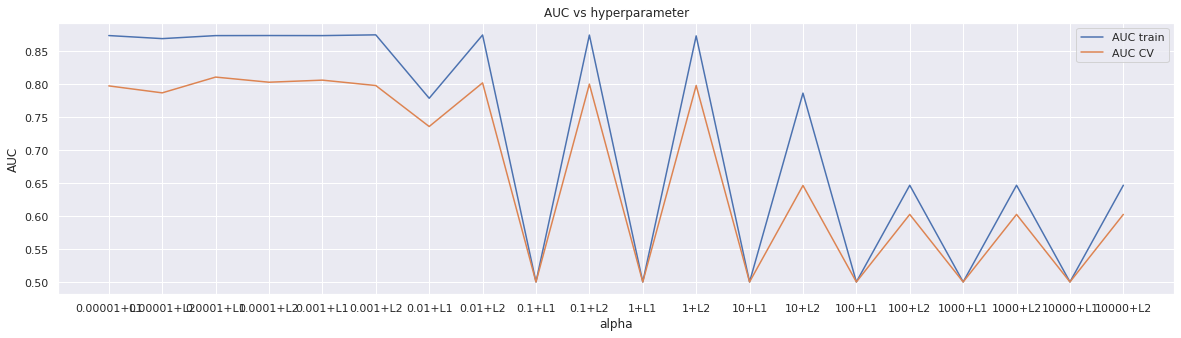

best Cross validation score: 0.810
optimal alpha and penalty for which auc is maximum :  0.0001+L1


In [ ]:
#Hyper_parameter tuning to find best_alpha and best_penalty
Hyper_parameter(tfidf_avgw2v_train,tfidf_avgw2v_cv,Y_train,Y_cv)

In [ ]:
#best alpha and penalty by  hyper parameter tuning
best_alpha=0.0001
best_penalty='l1'

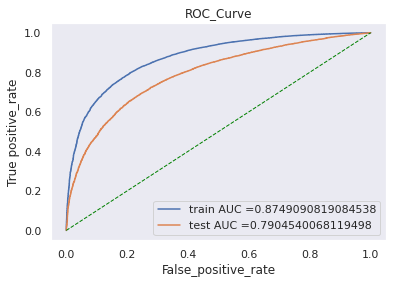

The AUC_score of test_data is : 0.7904540068119498


In [ ]:
#testing with the test data
test_data(tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.49      0.09      0.15      4529
           1       0.86      0.98      0.92     25471

    accuracy                           0.85     30000
   macro avg       0.67      0.54      0.53     30000
weighted avg       0.80      0.85      0.80     30000



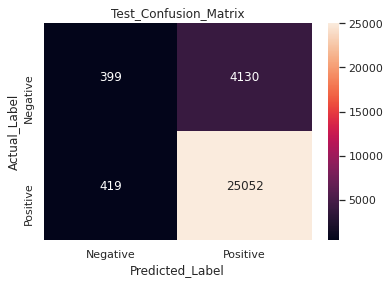

In [ ]:
#performance metric
metric(tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

Applying RBF SVM on BOW Features 

In [ ]:
#for Rbf svm we considering a only 40k points
#load the preprocessed data 
data=pd.read_csv('/content/drive/My Drive/preprocessed_data.csv',nrows=15000) 

In [ ]:
#use preprocessed_reviews and score for building a model
X=data['preprocessed_reviews'].values
Y=data['Score'].values

In [ ]:
print(X.shape)
print(Y.shape)

(15000,)
(15000,)


In [ ]:
#data splitting
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_cv.shape,Y_cv.shape)

(7350,) (7350,)
(4500,) (4500,)
(3150,) (3150,)


In [ ]:
#Apply Bow Features on Splitted data
from sklearn.feature_extraction.text import CountVectorizer
Vect=CountVectorizer(min_df=10, max_features=500)
Bow_train=Vect.fit_transform(X_train)
Bow_cv=Vect.transform(X_cv)
Bow_test=Vect.transform(X_test)
print(Bow_train.shape,Y_train.shape)
print(Bow_test.shape,Y_test.shape)
print(Bow_cv.shape,Y_cv.shape)

(7350, 500) (7350,)
(4500, 500) (4500,)
(3150, 500) (3150,)


In [ ]:
# we should standardize the data before applying logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_bow = sc.fit_transform(Bow_train)
X_test_bow = sc.transform(Bow_test)
X_cv_bow=sc.transform(Bow_cv)

In [ ]:
#defining function for find hyper parameter

def Hyper_parameter_rbf(X_train,X_cv,Y_train,Y_cv):
    import warnings
    max_roc_auc=-1
    cv_scores = []
    train_scores = []
    gamma = [0.001, 0.01, 0.1, 1, 10, 100,1000]
    C = [ 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    for i in C:
      for j in gamma:
        clf=SVC(kernel='rbf',probability=True,C=i,gamma=j)
        clf.fit(X_train,Y_train)
        clf.fit(X_train, Y_train)
        y_score=clf.predict_proba(X_cv)[:,1]
        scores = roc_auc_score(Y_cv, y_score)
        cv_scores.append(scores)
        y_score=clf.predict_proba(X_train)[:,1]
        scores = roc_auc_score(Y_train, y_score)
        train_scores.append(scores)
        s=['10^-4 (a) & 10^-3 (g)','10^-4 (a) & 10^-2 (g)','10^-4 (a) & 10^-1 (g)','10^-4 (a) & 10^0 (g)','10^-4 (a) & 10^1 (g)','10^-4 (a) & 10^2 (g)','10^-4 (a) & 10^3 (g)',
           '10^-3 (a) & 10^-3 (g)','10^-3 (a) & 10^-2 (g)','10^-3 (a) & 10^-1 (g)','10^-3 (a) & 10^0 (g)','10^-3 (a) & 10^1 (g)','10^-3 (a) & 10^2 (g)','10^-3 (a) & 10^3 (g)',
           '10^-2 (a) & 10^-3 (g)','10^-2 (a) & 10^-2 (g)','10^-2 (a) & 10^-1 (g)','10^-2 (a) & 10^0 (g)','10^-2 (a) & 10^1 (g)','10^-2 (a) & 10^2 (g)','10^-2 (a) & 10^3 (g)',
           '10^-1 (a) & 10^-3 (g)','10^-1 (a) & 10^-2 (g)','10^-1 (a) & 10^-1 (g)','10^-1 (a) & 10^0 (g)','10^-1 (a) & 10^1 (g)','10^-1 (a) & 10^2 (g)','10^-1 (a) & 10^3 (g)',
           '10^0 (a) & 10^-3(g)','10^0 (a) & 10^-2 (g)','10^0 (a) & 10^-1 (g)','10^0 (a) & 10^0 (g)','10^0 (a) & 10^1 (g)','10^0 (a) & 10^2 (g)','10^0 (a) & 10^3 (g)',
           '10^1 (a) & 10^-3 (g)','10^1 (a) & 10^-2 (g)','10^1 (a) & 10^-1 (g)','10^1 (a) & 10^0 (g)','10^1 (a) & 10^1 (g)','10^1 (a) & 10^2 (g)','10^1 (a) & 10^3 (g)',
           '10^2 (a) & 10^-3 (g)','10^2 (a) & 10^-2 (g)','10^2 (a) & 10^-1 (g)','10^2 (a) & 10^0 (g)','10^2 (a) & 10^1 (g)','10^2 (a) & 10^2 (g)','10^2 (a) & 10^3 (g)',
           '10^3 (a) & 10^-3 (g)','10^3 (a) & 10^-2 (g)','10^3 (a) & 10^-1 (g)','10^3 (a) & 10^0 (g)','10^3 (a) & 10^1 (g)','10^3 (a) & 10^2 (g)','10^3 (a) & 10^3 (g)',]
    optimal_alpha=s[cv_scores.index(max(cv_scores))]
    alpha=[math.log(x) for x in C]#converting values of alpha into logarithm
    fig = plt.figure(figsize=(60,20))
    ax = plt.subplot()
    ax.plot(s, train_scores, label='AUC train')
    ax.plot(s, cv_scores, label='AUC CV')
    plt.title('AUC vs hyperparameter')
    plt.xlabel('alpha(a) and gamma (g)')
    plt.ylabel('AUC')
    plt.xticks()
    ax.legend()
    plt.show()
    print('best Cross validation score: {:.3f}'.format(max(cv_scores)))
    print('optimal alpha and penalty for which auc is maximum : ',optimal_alpha)
    print("-"*15, "AUC Score for CV data", "-"*15)
    cv_scores = np.array(cv_scores)
    cv_scores = cv_scores.reshape(len(C),len(gamma))
    plt.figure(figsize=(10,5))
    sns.heatmap( cv_scores, annot=True, fmt=".3f", xticklabels=gamma, yticklabels=C)

In [ ]:
#Defining function for hyper parameter tuning
def Grid_search(X_train,Y_train):
  C = [ 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
  gamma = [0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
  parameters = {'C' : C, 'gamma' : gamma}
  model = GridSearchCV(SVC(kernel = "rbf", probability=True), parameters, cv = 3, scoring = "roc_auc",return_train_score=True)
  model.fit(X_train,Y_train)
  print("\n**********GridSearchCV**********\n")
  print("\nOptimal C:", model.best_estimator_.C)
  print("\nOptimal Gamma:", model.best_estimator_.gamma)
  print("\nBest kernel:", model.best_estimator_.kernel)
  print("\nBest Score:", model.best_score_)
  sns.set()
  df_gridsearch = pd.DataFrame(model.cv_results_)
  max_scores = df_gridsearch.groupby(['param_C','param_gamma']).max()
  max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
  sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
  plt.show()

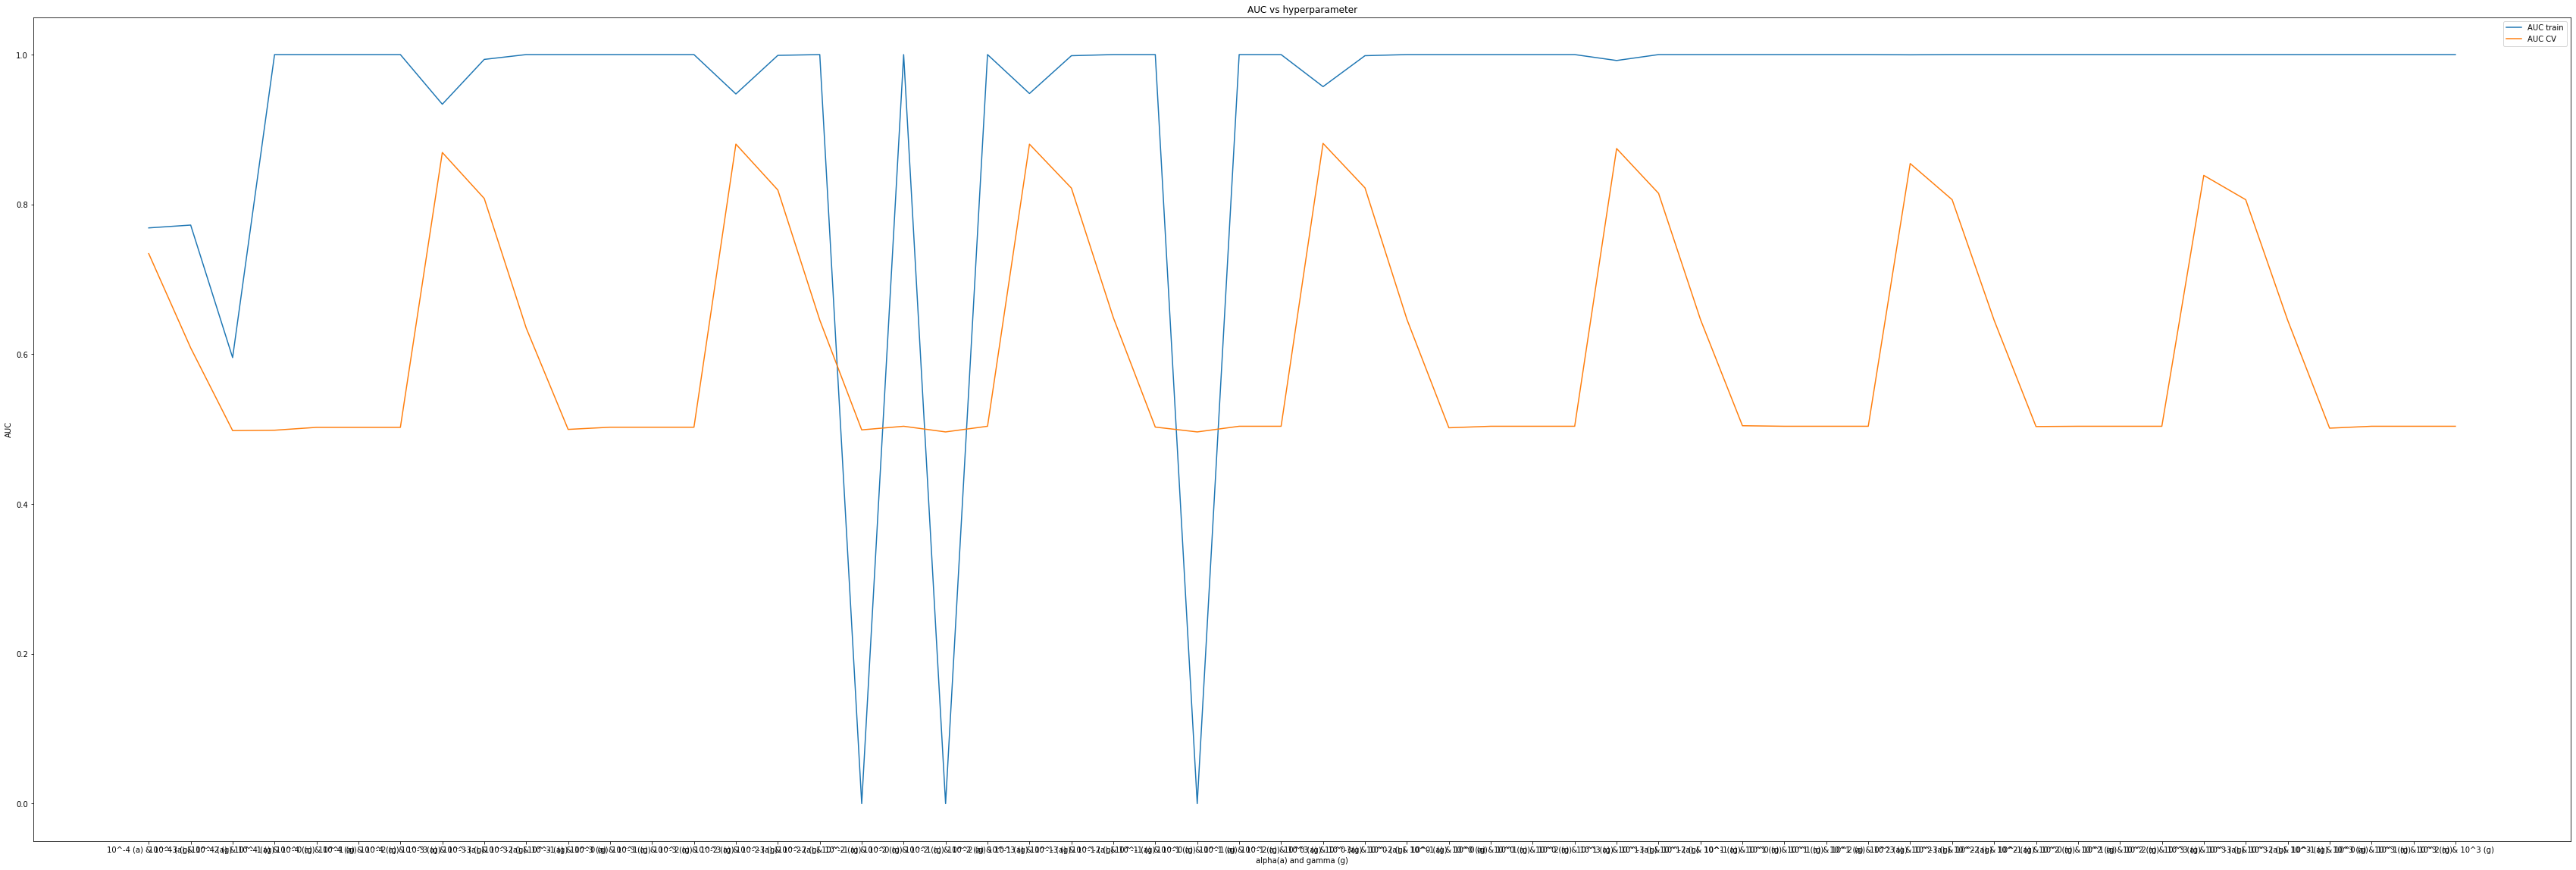

best Cross validation score: 0.881
optimal alpha and penalty for which auc is maximum :  10^0 (a) & 10^-3(g)
--------------- AUC Score for CV data ---------------


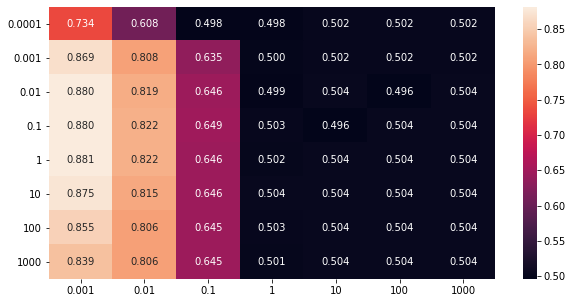

In [ ]:
#Hyper parameter tuning
Hyper_parameter_rbf(X_train_bow,X_cv_bow,Y_train,Y_cv)


**********GridSearchCV**********


Optimal C: 1

Optimal Gamma: 0.001

Best kernel: rbf

Best Score: 0.8576570250133869


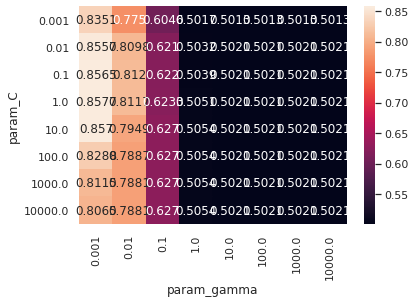

In [ ]:
 Grid_search(X_train_bow,Y_train)

In [ ]:
optimal_C=1
optimal_gamma=0.001

In [ ]:
#defining function for testing the test data
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

def svm_test_data(x_train,y_train,x_test,y_test):
    model=SVC(C=optimal_C,kernel='rbf',probability=True,gamma=optimal_gamma)
    model.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

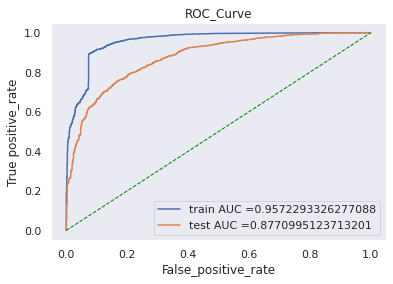

The AUC_score of test_data is : 0.8770995123713201


In [ ]:
svm_test_data(X_train_bow,Y_train,X_test_bow,Y_test)

In [ ]:
#defining confusion matric for RBF_Kernel
#Confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metric(x_train,y_train,x_test,y_test):
    model=SVC(C=optimal_C,kernel='rbf',probability=True,gamma=optimal_gamma)
    
    model.fit(x_train, y_train)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(Y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

           0       0.83      0.23      0.35       678
           1       0.88      0.99      0.93      3822

    accuracy                           0.88      4500
   macro avg       0.85      0.61      0.64      4500
weighted avg       0.87      0.88      0.84      4500



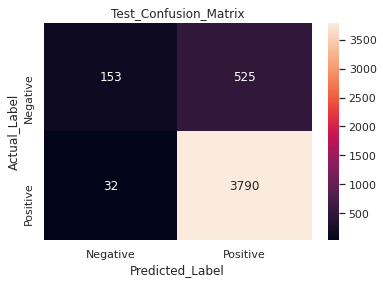

In [ ]:
metric(X_train_bow,Y_train,X_test_bow,Y_test)

Applying RBF SVM on tfidf Features

In [ ]:
# difine the tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(1, 2),min_df=10,max_features=500)
Train_tf_idf=tf_idf.fit_transform(X_train)
Cross_tf_idf=tf_idf.transform(X_cv)
Test_tf_idf=tf_idf.transform(X_test)
print(Train_tf_idf.shape,Y_train.shape)
print(Cross_tf_idf.shape,Y_cv.shape)
print(Test_tf_idf.shape,Y_test.shape)

(7350, 500) (7350,)
(3150, 500) (3150,)
(4500, 500) (4500,)


In [ ]:
# we should standardize the data before applying logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_tfidf = sc.fit_transform(Train_tf_idf)
X_cross_tfidf= sc.fit_transform(Cross_tf_idf)
X_test_tfidf = sc.transform(Test_tf_idf)

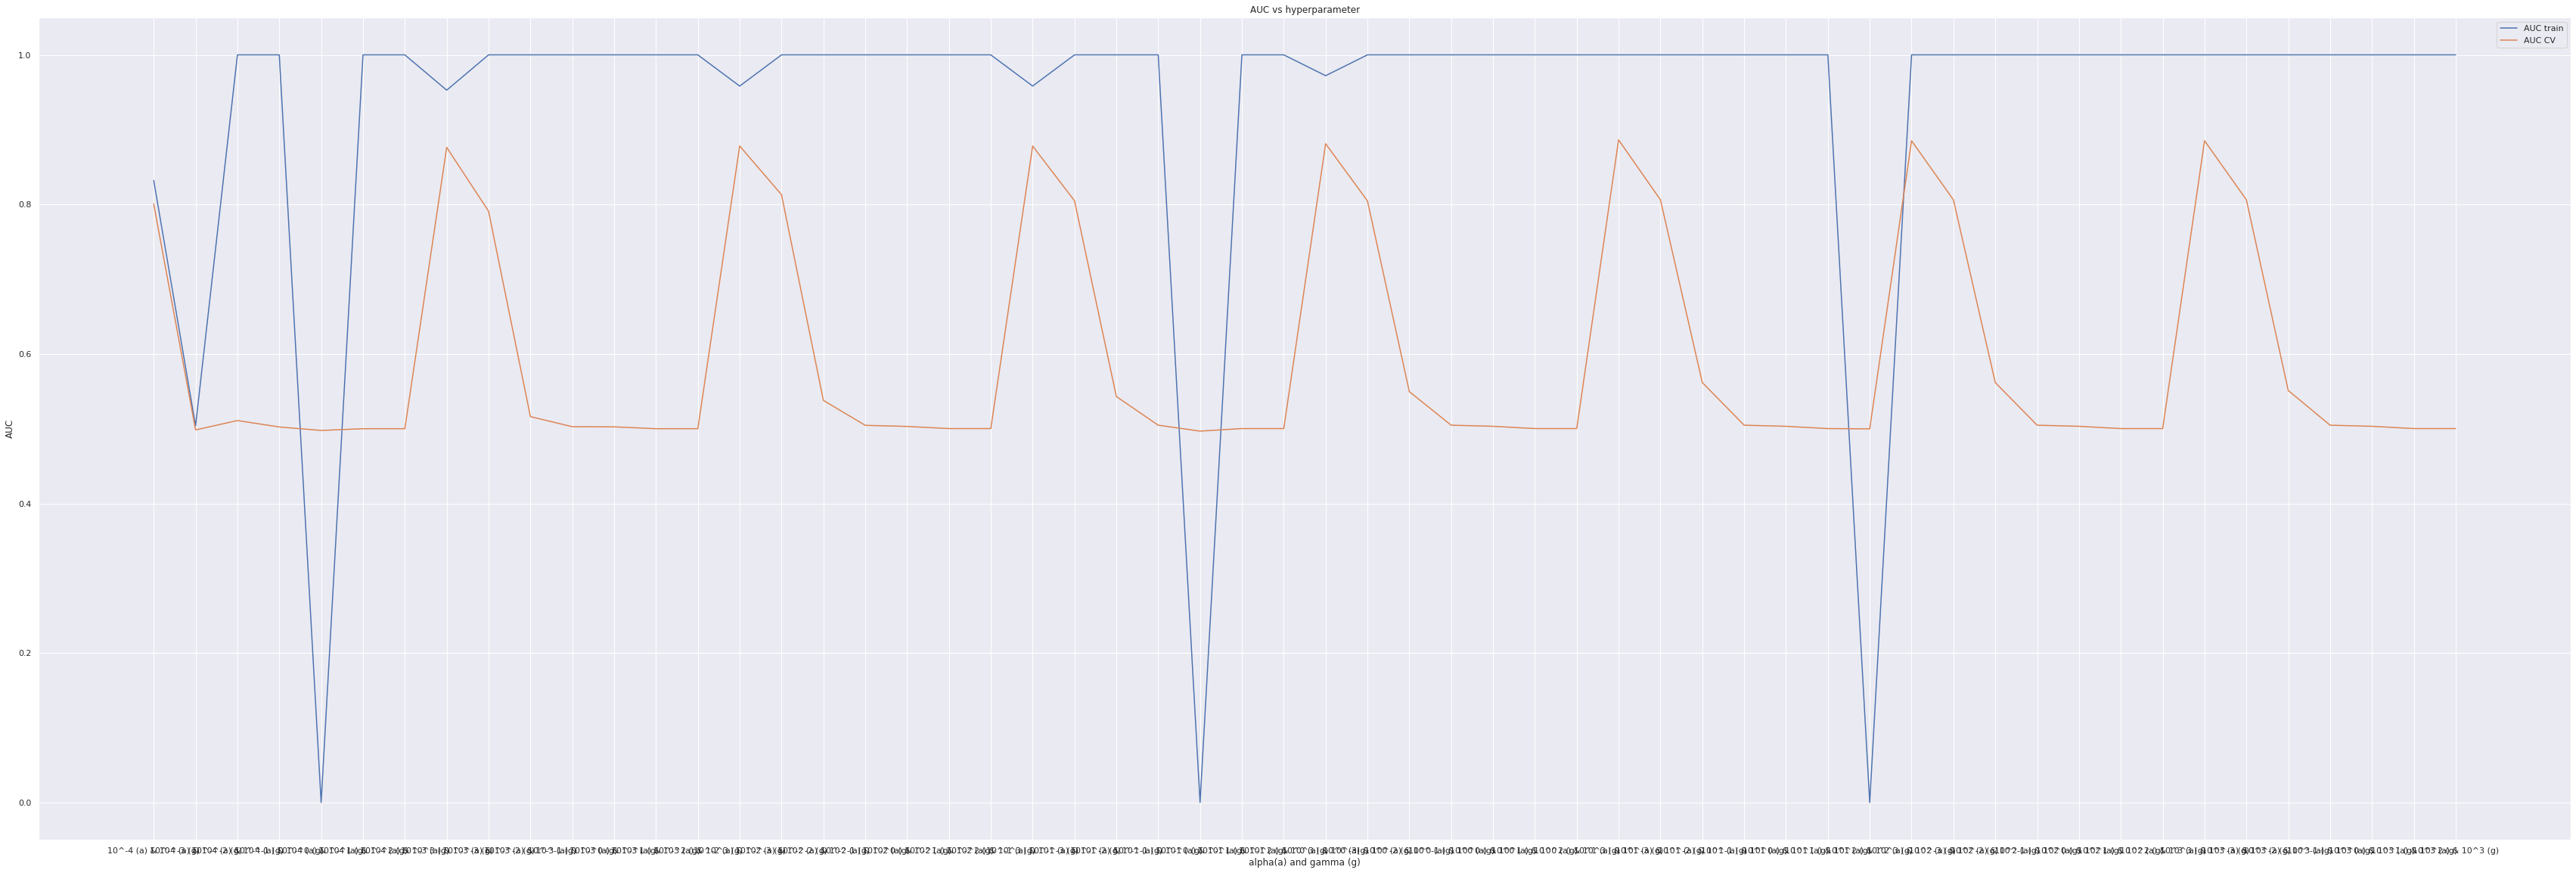

best Cross validation score: 0.886
optimal alpha and penalty for which auc is maximum :  10^1 (a) & 10^-3 (g)
--------------- AUC Score for CV data ---------------


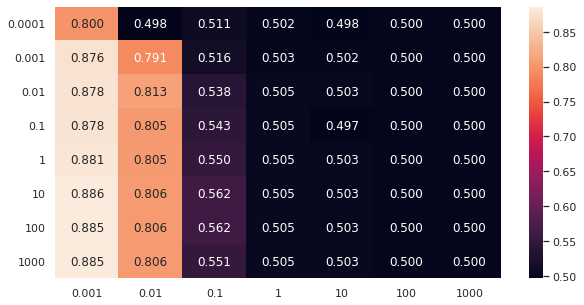

In [ ]:
#Hyper parameter tuning
Hyper_parameter_rbf(X_train_tfidf,X_cross_tfidf,Y_train,Y_cv)


**********GridSearchCV**********


Optimal C: 10

Optimal Gamma: 0.001

Best kernel: rbf

Best Score: 0.8653525717602034


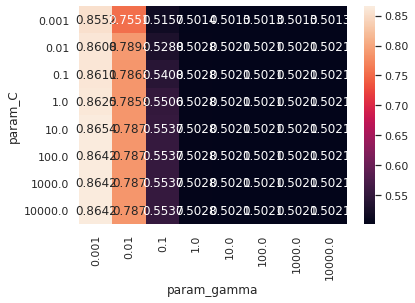

In [ ]:
Grid_search(X_train_tfidf,Y_train)

In [ ]:
optimal_C=10
optimal_gamma=0.001

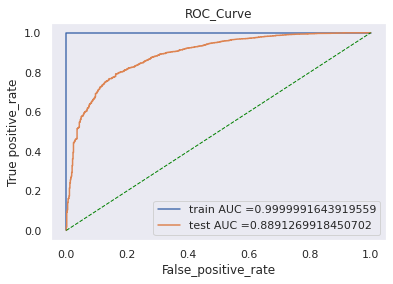

The AUC_score of test_data is : 0.8891269918450702


In [ ]:
#testing with test data
svm_test_data(X_train_tfidf,Y_train,X_test_tfidf,Y_test)

              precision    recall  f1-score   support

           0       0.67      0.49      0.56       678
           1       0.91      0.96      0.93      3822

    accuracy                           0.89      4500
   macro avg       0.79      0.72      0.75      4500
weighted avg       0.88      0.89      0.88      4500



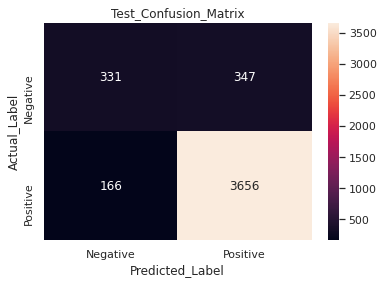

In [ ]:
#performance metric
metric(X_train_tfidf,Y_train,X_test_tfidf,Y_test)

Featurization using word2vec

In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
train_list_of_sentance=[]
for sentance in X_train:
    train_list_of_sentance.append(sentance.split())

In [ ]:
# Train your own Word2Vec model using your own text corpus for cross_validation data
i=0
cv_list_of_sentance=[]
for sentance in X_cv:
    cv_list_of_sentance.append(sentance.split())

In [ ]:
# Train your own Word2Vec model using your own text corpus for test data
i=0
test_list_of_sentance=[]
for sentance in X_test:
    test_list_of_sentance.append(sentance.split())

In [ ]:
print(len(train_list_of_sentance))
print(len(cv_list_of_sentance))
print(len(test_list_of_sentance))

7350
3150
4500


In [ ]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# min_count = 5 considers only words that occured atleast 5 times
train_w2v_model=Word2Vec(train_list_of_sentance,min_count=5,size=50, workers=4)

In [ ]:
#train_data
train_w2v_words = list(train_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(train_w2v_words))
print("sample words ", train_w2v_words[0:50])

number of words that occured minimum 5 times  4365
sample words  ['mine', 'came', 'flossi', 'insert', 'import', 'dog', 'not', 'regular', 'rawhid', 'chew', 'love', 'got', 'caus', 'qualiti', 'okay', 'guess', 'would', 'look', 'nicer', 'quick', 'expect', 'good', 'chile', 'plate', 'thank', 'much', 'buy', 'soon', 'year', 'old', 'care', 'cat', 'entir', 'life', 'present', 'four', 'three', 'one', 'wood', 'adopt', 'gobbl', 'friski', 'pate', 'varieti', 'marin', 'catch', 'sea', 'choic', 'ocean', 'whitefish']


In [ ]:
#cross_validation_data
cv_w2v_model=Word2Vec(cv_list_of_sentance,min_count=5,size=50, workers=4)
cv_w2v_words = list(cv_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(cv_w2v_words))
print("sample words ", cv_w2v_words[0:50])

number of words that occured minimum 5 times  2830
sample words  ['must', 'gluten', 'free', 'cook', 'not', 'let', 'anyon', 'tell', 'differ', 'huge', 'rice', 'flour', 'one', 'non', 'smell', 'love', 'live', 'without', 'suggest', 'cookbook', 'buy', 'book', 'reason', 'thrill', 'might', 'even', 'cri', 'littl', 'bake', 'good', 'tast', 'normal', 'organ', 'person', 'mean', 'happen', 'see', 'tea', 'thought', 'would', 'give', 'shot', 'order', 'box', 'came', 'earlier', 'expect', 'pack', 'like', 'crystal']


In [ ]:
#test_data
test_w2v_model=Word2Vec(test_list_of_sentance,min_count=5,size=50, workers=4)  
test_w2v_words = list(test_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(test_w2v_words))
print("sample words ", test_w2v_words[0:50])

number of words that occured minimum 5 times  3330
sample words  ['gave', 'boyfriend', 'christma', 'assum', 'like', 'wooden', 'crate', 'soup', 'come', 'attract', 'actual', 'got', 'amazon', 'order', 'jar', 'ship', 'present', 'time', 'review', 'price', 'per', 'seller', 'current', 'not', 'avail', 'via', 'prime', 'head', 'back', 'bought', 'last', 'night', 'buy', 'cheaper', 'gift', 'basket', 'typic', 'one', 'send', 'food', 'holiday', 'differ', 'put', 'block', 'cream', 'chees', 'vegan', 'special', 'diet', 'instant']


# Converting text into vectors using Avg W2V

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in train_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
train_vectors = np.array(train_vectors)
print(train_vectors.shape)
print(train_vectors[0])

(7350, 50)
[-0.1674539   0.36789133 -0.42666505  0.29366389 -0.49860246 -0.57807975
  0.4604301  -0.1568372   0.04435242  0.26618834 -0.59331831 -0.56679134
 -0.29518198 -0.22669275  0.15562116  0.11695584 -0.19997498 -0.82206798
  0.56299129 -0.10814517  0.15804461  0.19239724 -0.06453172  0.12665102
 -0.71561023  0.03294638 -0.07417683 -0.32475534  0.38897228 -0.06345141
  0.40022481  0.45499813 -0.43063306  0.10229608  0.03225533 -0.15588806
  0.74402829  0.19436727  0.72867077 -0.20420084 -0.89264043 -0.51962604
  0.30058274 -0.09393126  0.2188551  -0.18650716  0.09733927  0.50315537
  0.17326177 -0.49728428]


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
cv_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in cv_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in cv_w2v_words:
            vec = cv_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    cv_vectors.append(sent_vec)
cv_vectors = np.array(cv_vectors)
print(cv_vectors.shape)
print(cv_vectors[0])

(3150, 50)
[-0.34368554  0.51336164 -0.55505909  0.16906429 -0.35495792 -0.29307913
  0.09197032 -0.73231383  0.15155206  0.38856861 -0.70679205 -0.6916722
  0.01468359 -0.06737928  0.20143506  0.13614549  0.26086086 -0.58216579
  0.60479672 -0.34619813 -0.26719238  0.24769945 -0.05763073  0.1760502
 -0.82164059 -0.22335976  0.08912554 -0.36581992  0.43614741 -0.45265835
  0.33328146  0.52754001 -0.52545341 -0.08091121 -0.07186851 -0.02704613
  0.45091816 -0.14893253  0.56457872 -0.29469876 -0.68283178 -0.42117599
  0.35237943 -0.32272256  0.42100857 -0.23434497  0.08183263  0.19246038
 -0.26853385 -0.44953131]


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)
test_vectors = np.array(test_vectors)
print(test_vectors.shape)
print(test_vectors[0])

(4500, 50)
[-0.15371163  0.20265369 -0.37088047  0.18186184 -0.20586047 -0.3012146
  0.20026411 -0.41559467  0.03383193  0.20570973 -0.39226935 -0.5337175
 -0.09015807 -0.06493217  0.23507086  0.00840809 -0.05726117 -0.2466253
  0.33138535 -0.38046708 -0.20215458  0.20927895  0.03551518  0.0293666
 -0.4722578  -0.07750747 -0.09692336 -0.23156285  0.24289891 -0.37730501
  0.33696971  0.24631015 -0.21801472  0.03613824  0.05403855 -0.07764607
  0.39837771 -0.11868591  0.37388017 -0.2532544  -0.55662905 -0.34544041
  0.22939767 -0.10969403  0.4002209  -0.14345419  0.16990344  0.20692258
  0.00873828 -0.39866496]


In [ ]:
avgw2v_train= np.array(train_vectors)
avgw2v_cv= np.array(cv_vectors)
avgw2v_test= np.array(test_vectors)

Applying RBF SVM on Avg_w2v Features

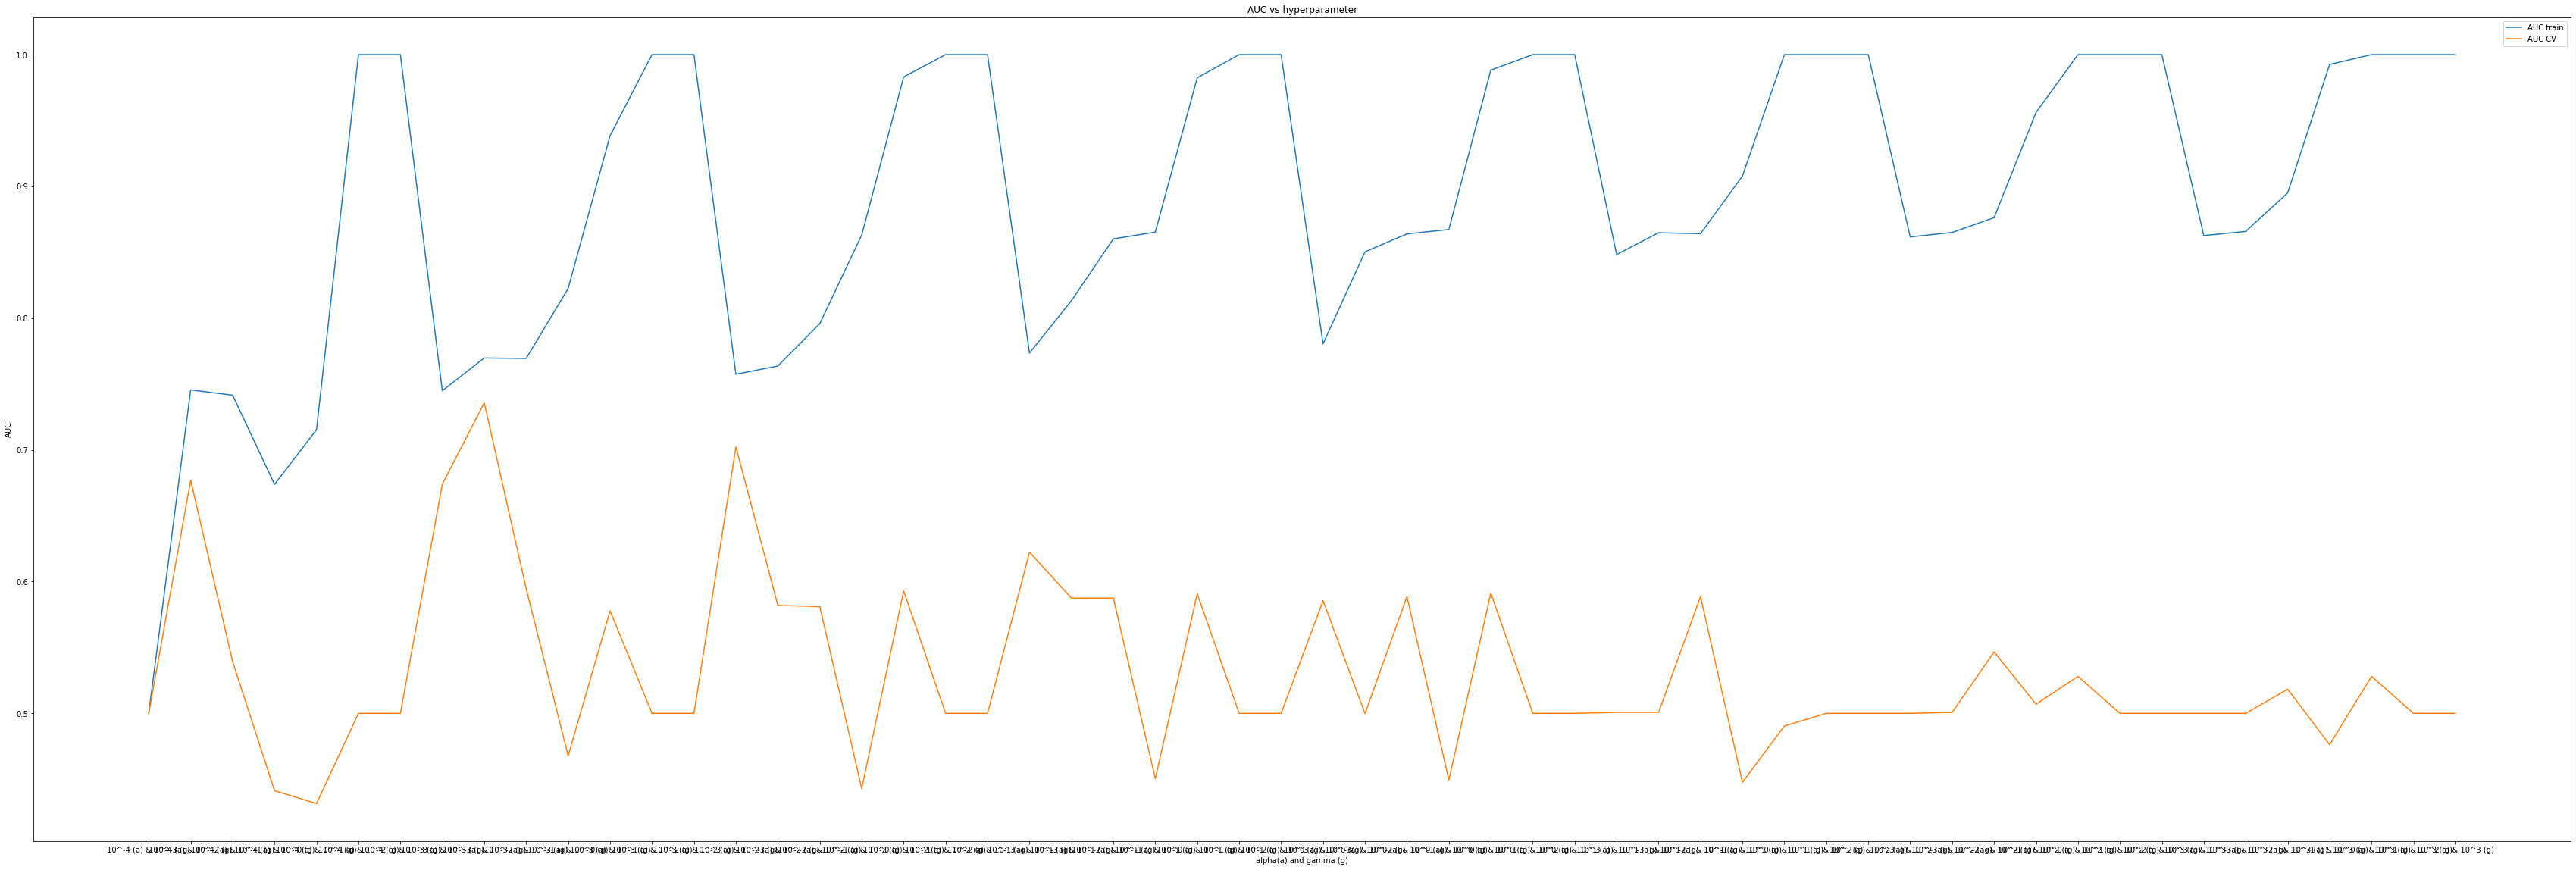

best Cross validation score: 0.736
optimal alpha and penalty for which auc is maximum :  10^-3 (a) & 10^-2 (g)
--------------- AUC Score for CV data ---------------


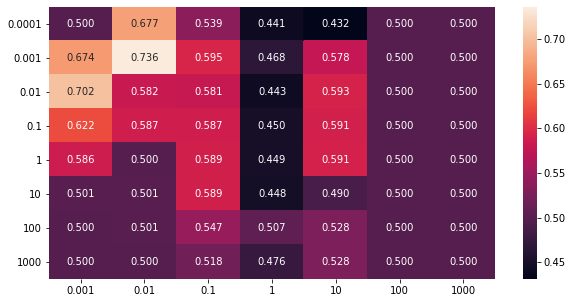

In [ ]:
#Hyper parameter tuning
Hyper_parameter_rbf(avgw2v_train,avgw2v_cv,Y_train,Y_cv)


**********GridSearchCV**********


Optimal C: 10000

Optimal Gamma: 0.01

Best kernel: rbf

Best Score: 0.8528960955146822


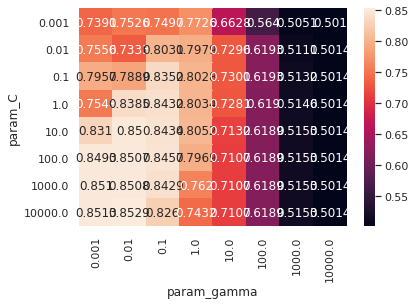

In [ ]:
Grid_search(avgw2v_train,Y_train)

In [ ]:
optimal_C=10000
optimal_gamma=0.01

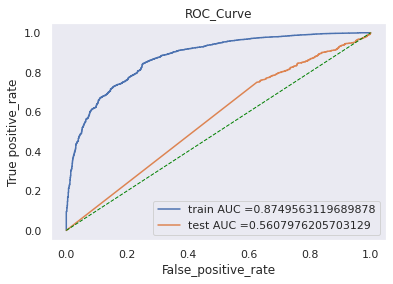

The AUC_score of test_data is : 0.5607976205703129


In [ ]:
#testing with test data
svm_test_data(avgw2v_train,Y_train,avgw2v_test,Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       707
           1       0.84      1.00      0.91      3793

    accuracy                           0.84      4500
   macro avg       0.42      0.50      0.46      4500
weighted avg       0.71      0.84      0.77      4500



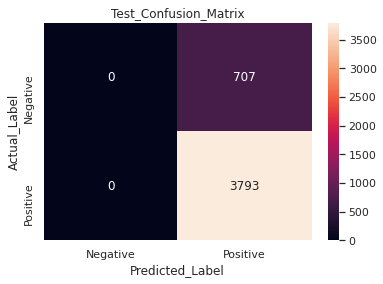

In [ ]:
#performance metric
metric(avgw2v_train,Y_train,avgw2v_test,Y_test)

# Converting text into vectors using TFIDF W2V

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
train_tfidf_w2v = tfidf_vect.fit_transform(X_train)

In [ ]:
dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))

In [ ]:
# tf_idf_w2v words of train data
tfidf_feat = tfidf_vect.get_feature_names()
train_tfidf_w2v_vectors = []
row = 0
for sent in train_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in train_w2v_words and word in tfidf_feat:
            vec = train_w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    train_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
# tf_idf_w2v words of cross_validate data
tfidf_feat = tfidf_vect.get_feature_names()
cv_tfidf_w2v_vectors = []
row = 0
for sent in cv_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in cv_w2v_words and word in tfidf_feat:
            vec = cv_w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    cv_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
# tf_idf_w2v words of test data
tfidf_feat = tfidf_vect.get_feature_names()
test_tfidf_w2v_vectors = []
row = 0
for sent in test_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in test_w2v_words and word in tfidf_feat:
            vec = test_w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    test_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
tfidf_avgw2v_train= np.array(train_tfidf_w2v_vectors)
tfidf_avgw2v_cv=np.array(cv_tfidf_w2v_vectors)
tfidf_avgw2v_test= np.array(test_tfidf_w2v_vectors)

Applying RBF SVM on tfidf_Avg_w2v Features


**********GridSearchCV**********


Optimal C: 10000

Optimal Gamma: 0.01

Best kernel: rbf

Best Score: 0.8210834980370012


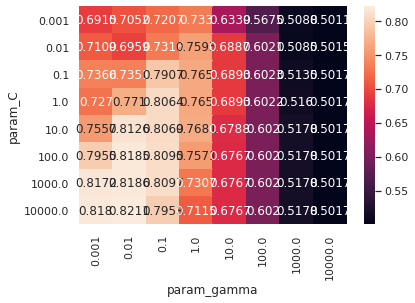

In [ ]:
Grid_search(tfidf_avgw2v_train,Y_train)

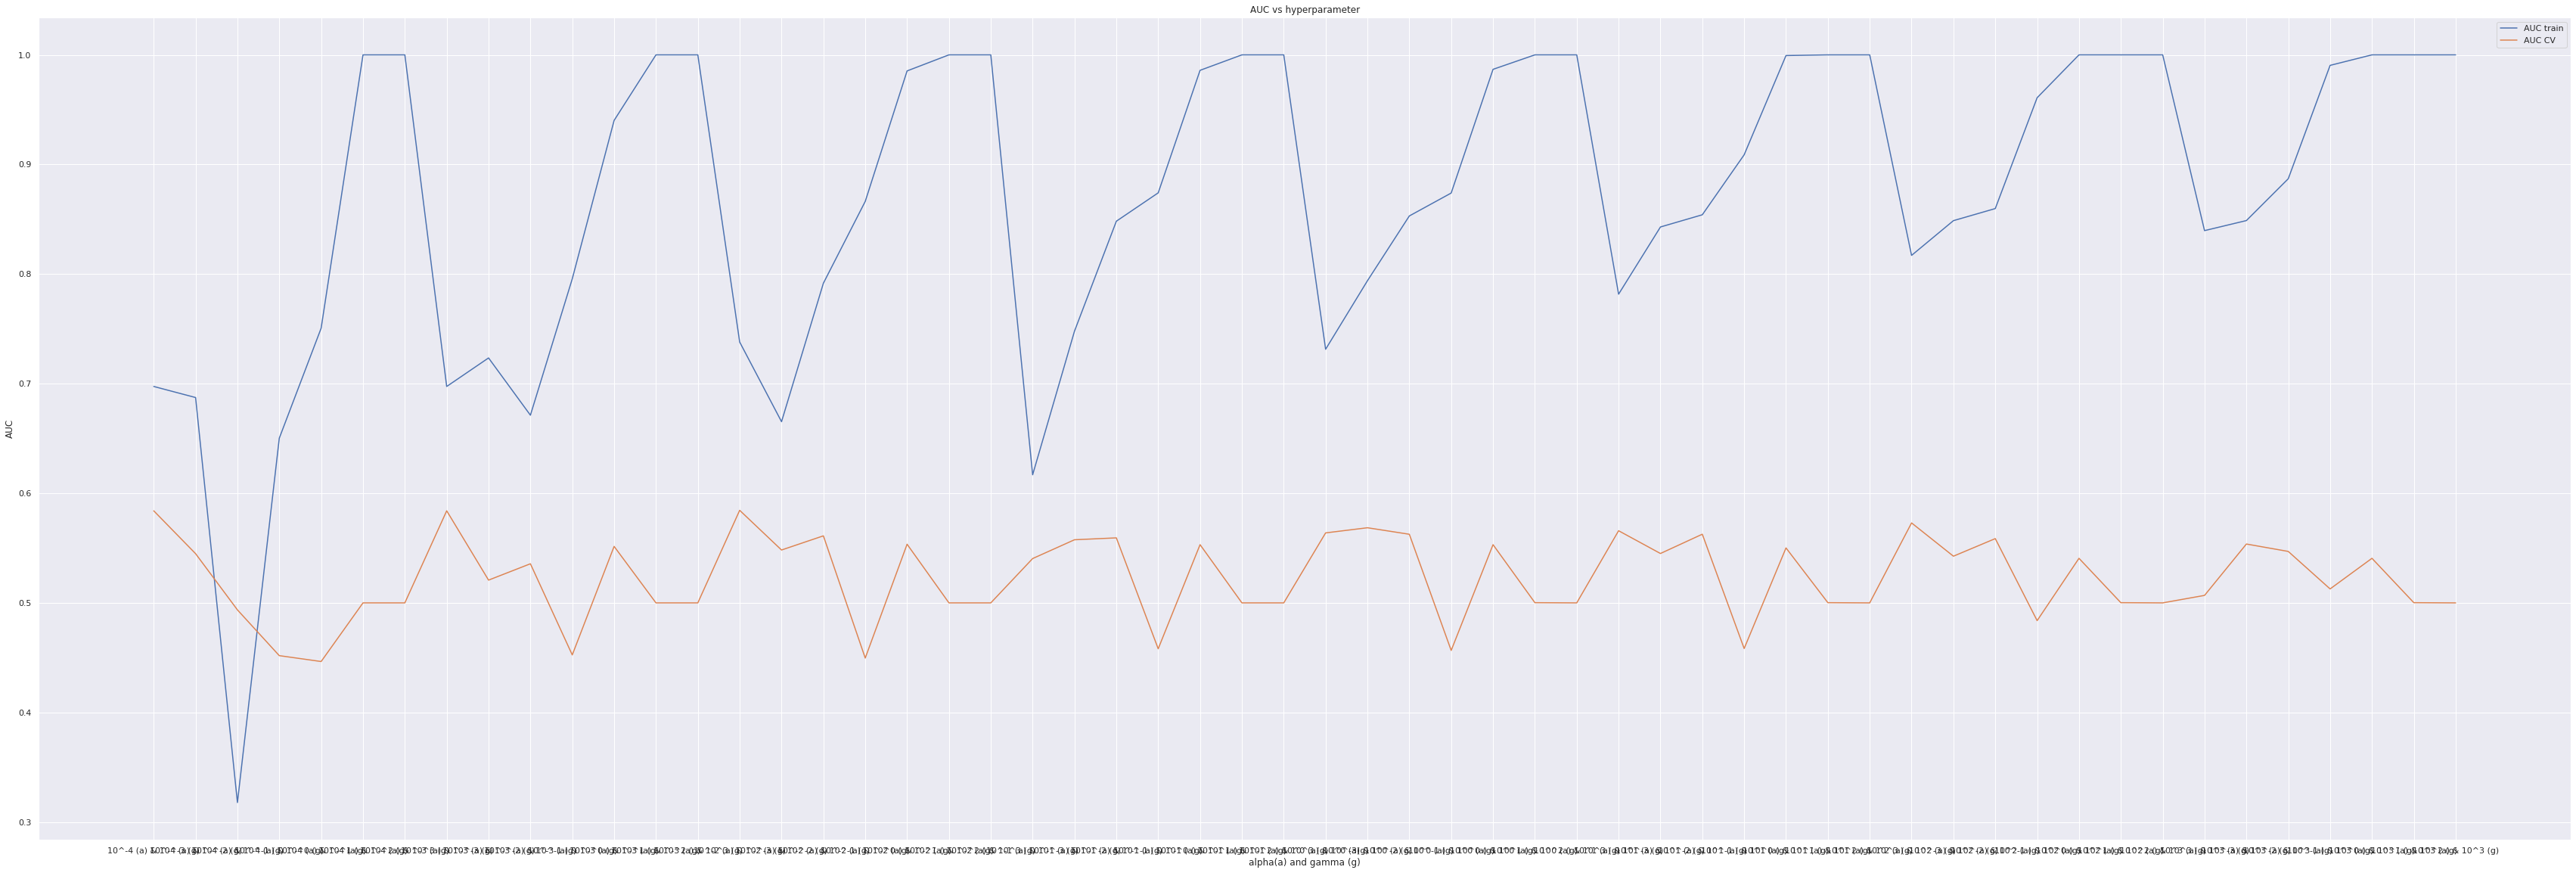

best Cross validation score: 0.584
optimal alpha and penalty for which auc is maximum :  10^-2 (a) & 10^-3 (g)
--------------- AUC Score for CV data ---------------


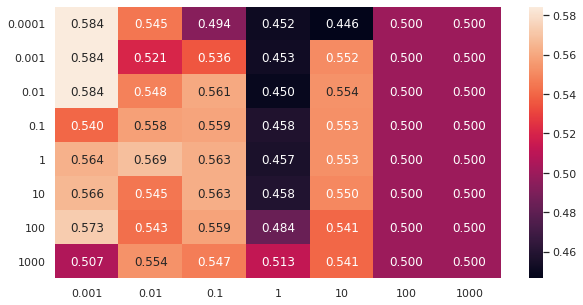

In [ ]:
#Hyper parameter tuning
Hyper_parameter_rbf(tfidf_avgw2v_train,tfidf_avgw2v_cv,Y_train,Y_cv)

In [ ]:
optimal_C=10000
optimal_gamma=0.01

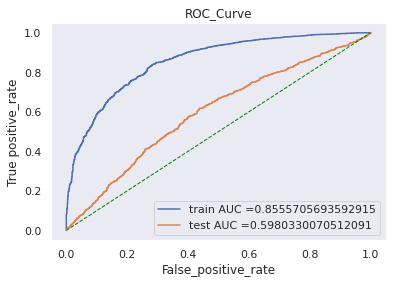

The AUC_score of test_data is : 0.5980330070512091


In [ ]:
#testing with test data
svm_test_data(tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.18      0.73      0.28       661
           1       0.90      0.42      0.57      3839

    accuracy                           0.46      4500
   macro avg       0.54      0.57      0.43      4500
weighted avg       0.79      0.46      0.53      4500



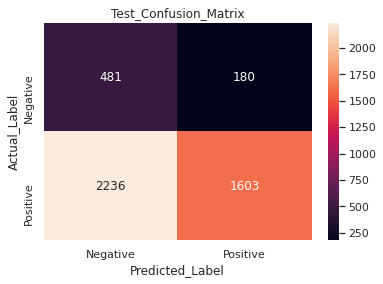

In [ ]:
#performance metric
metric(tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

# Conclusion

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Best Hyper Parameter(C) and penalty(p)"," Auc Score"]
x.add_row(["BoW","Liner kernel",(0.1,'l2'),90.26])
x.add_row(["Tf-Idf","Liner kernel",(1,'l2'),93.29])
x.add_row(["Avg-W2V","Liner kernel",(0.1,'l2'),86.33])
x.add_row(["TfIdf-W2V","Liner kernel",(0.0001,'l1'),79.04])

y = PrettyTable()
y.field_names = ["Vectorizer", "Model", "Best Hyper Parameter(C & gamma)"," Auc Score"]
y.add_row(["BoW","RBF kernel",(1,0.001),87.70])
y.add_row(["Tf-Idf","RBF kernel",(10,0.001),88.91])
y.add_row(["Avg-W2V","RBF kernel",(10000,0.01),56.07])
y.add_row(["TfIdf-W2V","RBF kernel",(10000,0.01),59.80])
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('****Final Conclusion:****')
print(x)
print(y)

****Final Conclusion:****

+------------+--------------+----------------------------------------+------------+
| Vectorizer |    Model     | Best Hyper Parameter(C) and penalty(p) |  Auc Score |
+------------+--------------+----------------------------------------+------------+
|    BoW     | Liner kernel |              (0.1, 'l2')               |   90.26    |
|   Tf-Idf   | Liner kernel |               (1, 'l2')                |   93.29    |
|  Avg-W2V   | Liner kernel |              (0.1, 'l2')               |   86.33    |
| TfIdf-W2V  | Liner kernel |             (0.0001, 'l1')             |   79.04    |
+------------+--------------+----------------------------------------+------------+
+------------+------------+---------------------------------+------------+
| Vectorizer |   Model    | Best Hyper Parameter(C & gamma) |  Auc Score |
+------------+------------+---------------------------------+------------+
|    BoW     | RBF kernel |            (1, 0.001)           |    87.7    |
|   Tf-Idf   | RBF kernel | 

From the above table we conclude that TFIDF featurization with L2 and best C is 1 Regularization have the Highest AUC score i.e 93.29 %